In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
train = pd.read_csv("Kaggle_Training_Dataset_v2.csv")
test = pd.read_csv("Kaggle_Test_Dataset_v2.csv")

E:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
train.shape

(1687861, 23)

In [5]:
train.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [6]:
test.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


In [7]:
train.dtypes

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

The sku column is just a unique identifier and thus, can be removed as it has no effect on the outcome of the entry

In [8]:
train = train.drop(['sku'], axis=1)
test = test.drop(['sku'], axis=1)

We extract the categorical variables for separate processing

In [9]:
s = (train.dtypes == 'object')
cat_var = list(s[s].index)

In [10]:
print(cat_var)

['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']


In [11]:
train.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [12]:
train.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
national_inv,1.000000,0.003326,0.098238,0.078199,0.079744,0.078948,0.147449,0.192605,0.225067,0.239613,0.399969,0.030677,-0.013544,-0.010732,0.014887
lead_time,0.003326,1.000000,-0.007238,-0.008010,-0.008513,-0.008738,-0.006013,-0.007279,-0.007270,-0.007313,-0.008198,-0.001500,-0.099940,-0.106019,-0.001306
in_transit_qty,0.098238,-0.007238,1.000000,0.662648,0.687768,0.679152,0.619270,0.698417,0.689908,0.659372,0.749974,0.167460,0.003282,0.004292,0.066612
forecast_3_month,0.078199,-0.008010,0.662648,1.000000,0.990490,0.977337,0.684494,0.781178,0.835585,0.825539,0.725042,0.361214,0.008445,0.008694,0.039419
forecast_6_month,0.079744,-0.008513,0.687768,0.990490,1.000000,0.994945,0.701770,0.808755,0.868099,0.858253,0.738553,0.363147,0.008343,0.008499,0.039724
forecast_9_month,0.078948,-0.008738,0.679152,0.977337,0.994945,1.000000,0.716367,0.829911,0.891884,0.881894,0.735891,0.366001,0.008306,0.008421,0.039732
sales_1_month,0.147449,-0.006013,0.619270,0.684494,0.701770,0.716367,1.000000,0.918548,0.867479,0.815959,0.756137,0.249526,0.001163,0.002370,0.066188
sales_3_month,0.192605,-0.007279,0.698417,0.781178,0.808755,0.829911,0.918548,1.000000,0.975594,0.929491,0.856017,0.304565,0.001488,0.002837,0.071030
sales_6_month,0.225067,-0.007270,0.689908,0.835585,0.868099,0.891884,0.867479,0.975594,1.000000,0.971833,0.837110,0.323552,0.002898,0.004221,0.057765
sales_9_month,0.239613,-0.007313,0.659372,0.825539,0.858253,0.881894,0.815959,0.929491,0.971833,1.000000,0.800890,0.317692,0.003438,0.004749,0.048880


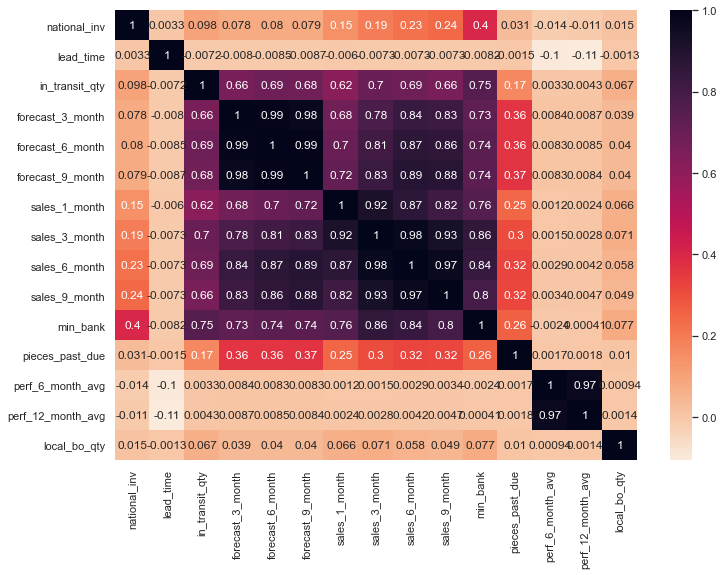

In [13]:
corrMatrix = train.corr()
sns.heatmap(corrMatrix, annot=True, cmap="rocket_r")
plt.show()

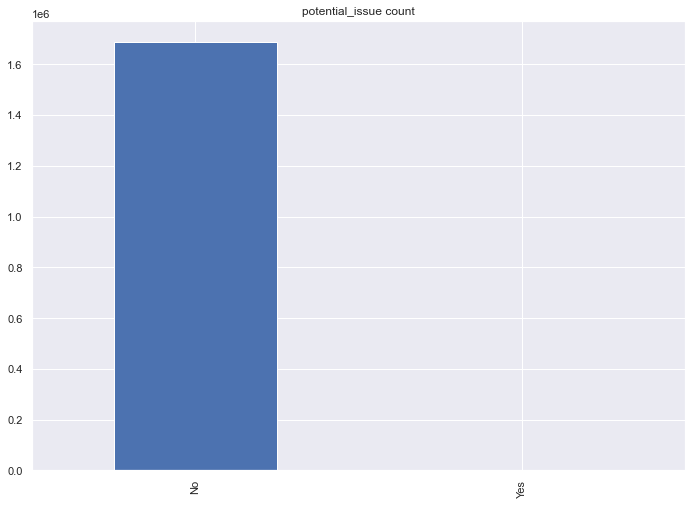

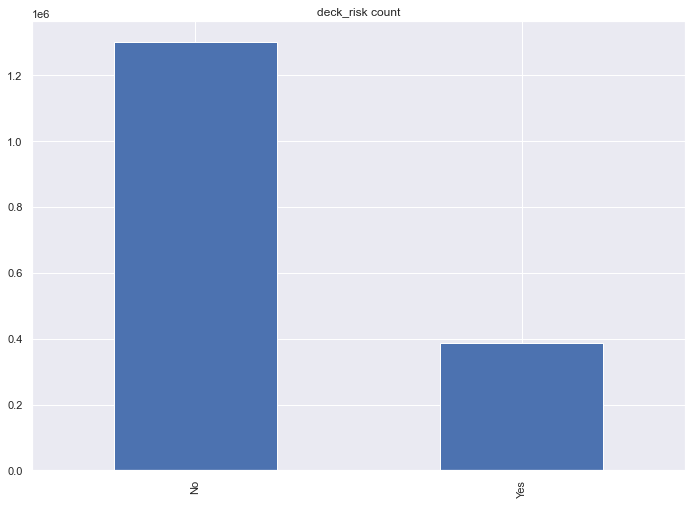

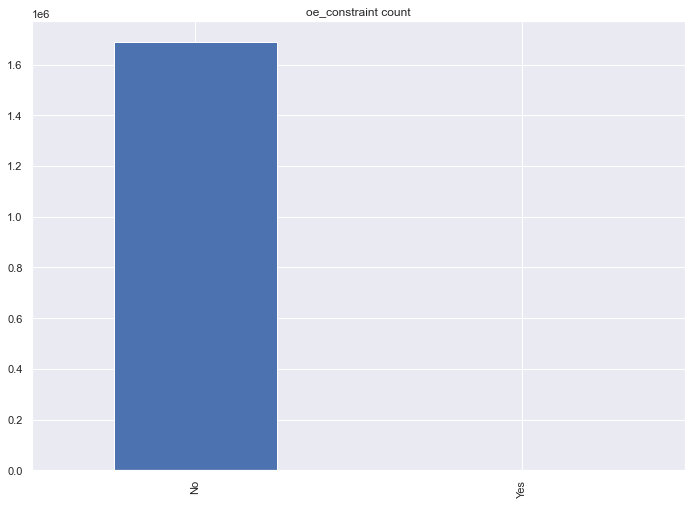

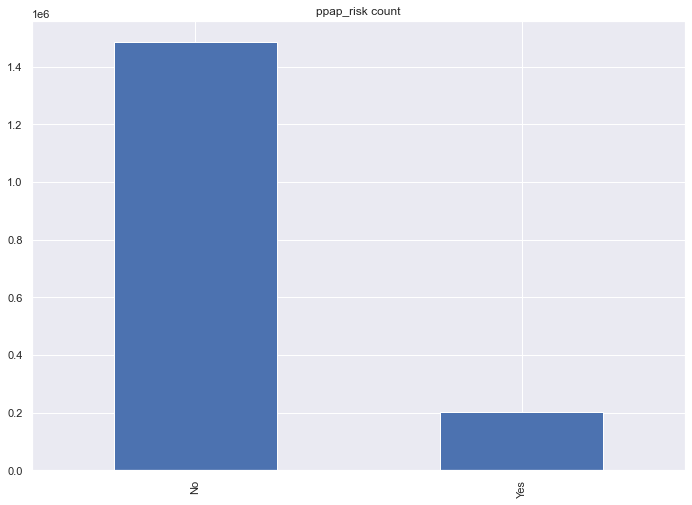

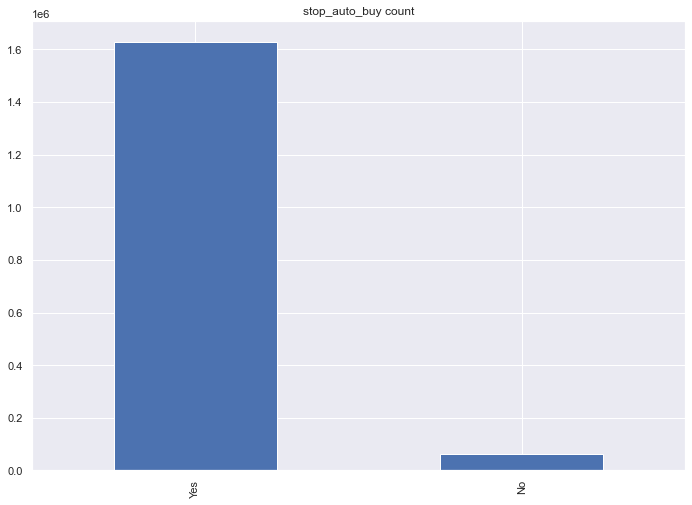

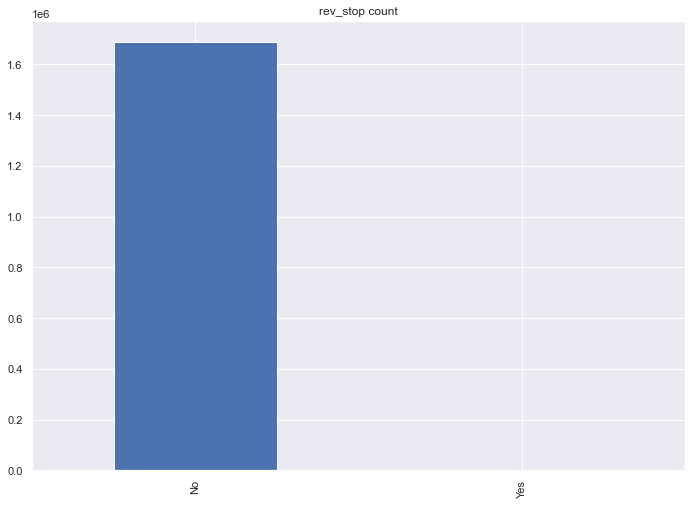

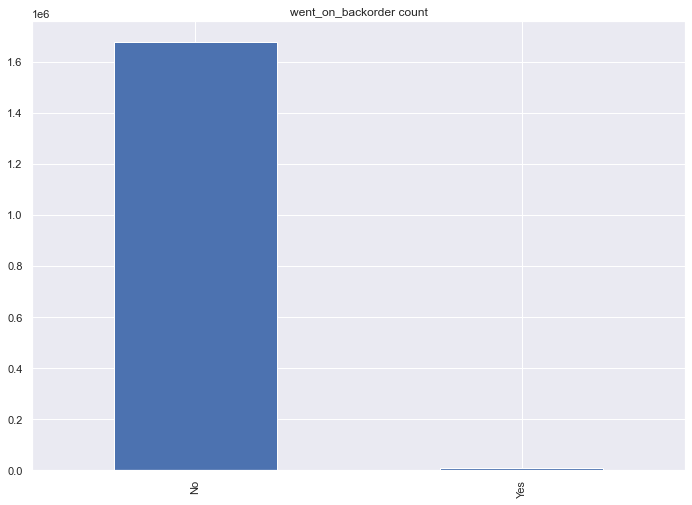

In [14]:
for x in cat_var:
    plt.figure()
    train[x].value_counts().plot.bar(title=x+" count")

In [15]:
train.isna().sum()

national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

It appears that there is one row that has multiple nan values and this row can be deleted, we find which row it is by tracing it with the label/class column.

In [16]:
train[train['went_on_backorder'].isnull()]

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It appears it is the final row. We can rid of this final row by doing this and we check for nulls again after removing the last row:

In [17]:
train = train[:-1]

In [18]:
train.isna().sum()

national_inv              0
lead_time            100893
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

We check if the same pattern is recurrent in the test data as well

In [19]:
test.isna().sum()

national_inv             1
lead_time            14725
in_transit_qty           1
forecast_3_month         1
forecast_6_month         1
forecast_9_month         1
sales_1_month            1
sales_3_month            1
sales_6_month            1
sales_9_month            1
min_bank                 1
potential_issue          1
pieces_past_due          1
perf_6_month_avg         1
perf_12_month_avg        1
local_bo_qty             1
deck_risk                1
oe_constraint            1
ppap_risk                1
stop_auto_buy            1
rev_stop                 1
went_on_backorder        1
dtype: int64

In [20]:
test.tail()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
242071,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,88.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Again the last row is filled with NaN values in test data as well and we remove this row. 

In [21]:
test = test[:-1]

In [22]:
test.tail()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
242070,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242071,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,88.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


Check for null values in train data

In [23]:
train.isna().sum()

national_inv              0
lead_time            100893
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

### Estimating relationship between 'lead_time' and 'went_on_backorder'
We start by dropping the null values

In [24]:
wo_na = train.dropna()

In [25]:
X_wona = wo_na.drop(['went_on_backorder'], axis=1)
y_wona = wo_na['went_on_backorder']

In [26]:
wo_na.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
5,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No
7,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,Yes,No,Yes,Yes,No,No
9,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No


<AxesSubplot:xlabel='lead_time', ylabel='Count'>

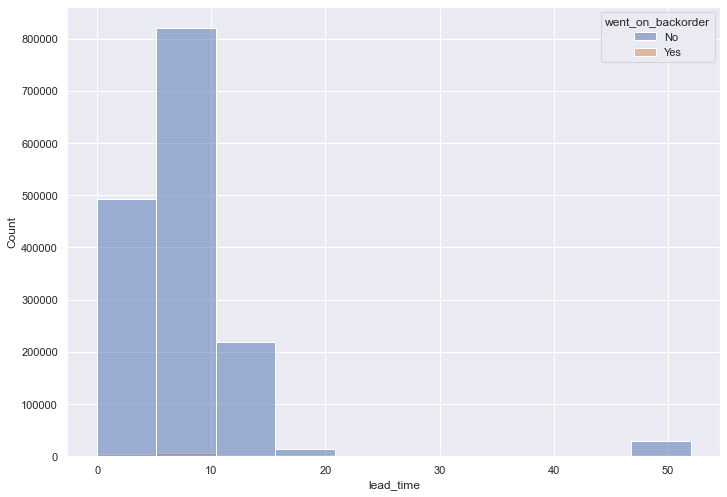

In [27]:
sns.histplot(x='lead_time', data=wo_na, hue='went_on_backorder', bins=10)

In [28]:
wo_na['went_on_backorder'].value_counts()

No     1575998
Yes      10969
Name: went_on_backorder, dtype: int64

We see that the dataset is highly imbalanced and would require undersampling to get a taste of what is the distribution of values for 'lead_time' when 'went_on_backorder' is yes.

In [29]:
from imblearn.under_sampling import RandomUnderSampler

In [30]:
undersample = RandomUnderSampler(sampling_strategy='majority')

In [31]:
under_X, under_y = undersample.fit_resample(X_wona, y_wona)

In [32]:
under_y.value_counts()

Yes    10969
No     10969
Name: went_on_backorder, dtype: int64

In [33]:
under_X['label'] = under_y

In [34]:
bins = under_X.lead_time.unique()
bins = sorted(bins)
print(bins)

[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 20.0, 22.0, 30.0, 35.0, 52.0]


<AxesSubplot:xlabel='lead_time', ylabel='Count'>

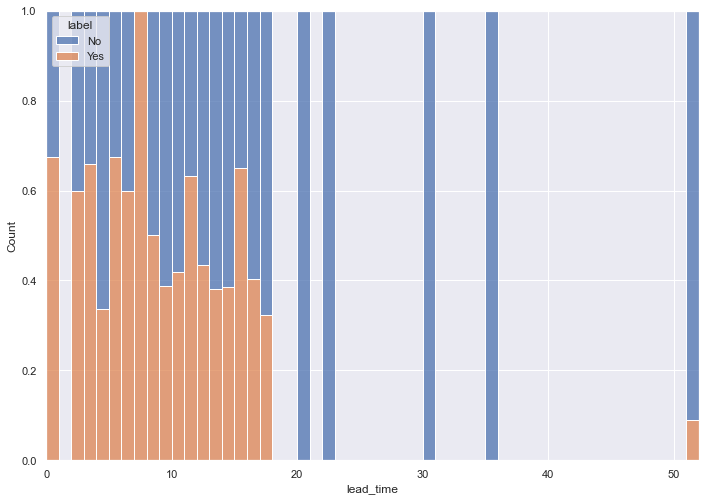

In [35]:
sns.histplot(x='lead_time', data=under_X, hue='label', multiple='fill', binwidth=1.0, bins=bins)

In [36]:
df = under_X[under_X['lead_time'] > 50]
df.groupby('label').size()

label
No     221
Yes     22
dtype: int64

We see that the 'yes' responses to 'went_on_backorder' are largely concentrated where the 'lead_time' is below 20 with some minute outlier exceptions. Thus, it can be assumed that there is a relationship between the two values. We can use this relationship to fill the missing values for 'lead_time'.

In [37]:
yes_df = train[train['went_on_backorder'] == 'Yes']
no_df =  train[train['went_on_backorder'] == 'No']

In [38]:
print(yes_df['lead_time'].isnull().sum())
print(no_df['lead_time'].isnull().sum())

324
100569


In [39]:
no_df.shape

(1676567, 22)

We create a function that creates a new feature to be able to compare the distribution of values if random imputation is applied for handling missing values.  

In [40]:
def impute_nan(df, variable):
    df[variable+"_random"]=df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+"_random"] = random_sample

In [41]:
impute_nan(train, "lead_time")

In [42]:
train.isnull().sum()

national_inv              0
lead_time            100893
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
lead_time_random          0
dtype: int64

A KDE plot can give a pictorial representation if random imputation has disturbed the distribution of the values. 

fig = plt.figure()
ax = fig.add_subplot(111)
train['lead_time'].plot(kind='kde', ax=ax)
train['lead_time_random'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


In [43]:
train['lead_time'] = train['lead_time_random']

In [44]:
train = train.drop(['lead_time_random'], axis=1)

In [45]:
train.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

Now we split the labels from the the data

In [68]:
Xtrain = train.drop(['went_on_backorder'], axis=1)
ytrain = train['went_on_backorder']

In [ ]:
Xtest = test.drop(['went_on_backorder'], axis=1)
ytest = test['went_on_backorder']

In [69]:
ytrain.value_counts()

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64

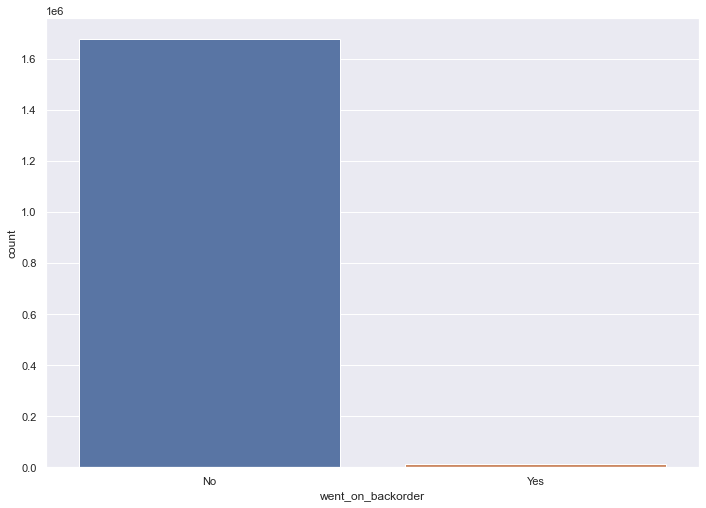

In [70]:
sns.countplot(x=train['went_on_backorder'],label="Count")
plt.show()

As the dataset is highly imbalanced, we can get it balanced by oversampling. 

In [31]:
from imblearn.over_sampling import RandomOverSampler

In [32]:
os = RandomOverSampler(random_state=42)

In [33]:
X, y = os.fit_sample(Xtrain, ytrain)

In [ ]:
sns.countplot(x=y,label="Count")
plt.show()

In [ ]:
X.shape, y.shape

In [ ]:
X.head()

In [ ]:
X.isna().sum()

In [ ]:
plot = sns.catplot(x="lead_time",y="went_on_backorder",data=train,kind="bar",height = 6,palette =
"muted")
plot.despine(left=True)
plot = plot.set_ylabels("backorder probability")

In [ ]:
X.lead_time.value_counts().sort_index()

In [ ]:
sns.histplot(x='lead_time', data = osTrain, hue='class', binwidth=1, binrange=(0,20), stat='density',
            palette='mako');


In [ ]:
g = sns.FacetGrid(train, col='went_on_backorder')
g = g.map(sns.histplot, "lead_time")
plt.show()

In [ ]:
osTrain = X.copy()

In [ ]:
osTrain['class'] = y

In [ ]:
osTrain['class'].value_counts()

In [ ]:
plt.scatter(osTrain['lead_time'], osTrain['class'])

In [ ]:
sns.boxplot(x=osTrain["class"], y=osTrain["lead_time"])

In [ ]:
osTrain["lead_time"].describe().T

In [ ]:
X['lead_time'].fillna(X['lead_time'].median(), inplace=True)